#Equipe
- Alana Pereira
- Caio José
- Diego Queiroz
- Emannuel Victor
- Matheus Menezes
- Rafael Barbosa

In [1]:
!pip install pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum, avg, max, min, count
from pyspark.sql.functions import col, when
from pyspark.sql.types import IntegerType, BooleanType, DoubleType

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

spark = SparkSession.builder.appName("ProjetoSpotify").getOrCreate()
df = spark.read.csv("Spotify.csv", header=True, inferSchema=True)

df.show()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=f8b59037d7dcb9be1418015682a8010fe6f772bcb7bf61237bb1ded1ec7f26b0
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark
+---+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+-----------+
|_c0|            track_id|             artists|          album_name|          track_name|popularity|duration_ms|explicit|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|  tempo|time_signature|track_genre|
+---+--------------------+--------------------+--------------------+-------

In [2]:
df= df.drop("_c0")


In [3]:
df.count()

114000

In [4]:
pd.DataFrame(df.take(df.count()), columns=df.columns)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,1,-6.746,0,0.143,0.0322,0.000001,0.358,0.715,87.917,4.0,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.42,0.166,1,-17.235,1,0.0763,0.924,0.000006,0.101,0.267,77.489,4.0,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.359,0,-9.734,1,0.0557,0.21,0.000000,0.117,0.12,76.332,4.0,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.905,0.000071,0.132,0.143,181.740,3.0,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.443,2,-9.681,1,0.0526,0.469,0.000000,0.0829,0.167,119.949,4.0,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.235,5,-16.393,1,0.0422,0.64,0.928000,0.0863,0.0339,125.995,5.0,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.117,0,-18.318,0,0.0401,0.994,0.976000,0.105,0.035,85.239,4.0,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.329,0,-10.895,0,0.042,0.867,0.000000,0.0839,0.743,132.378,4.0,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.506,7,-10.889,1,0.0297,0.381,0.000000,0.27,0.413,135.960,4.0,world-music


#Transformando as colunas para diferentes DataTypes

In [5]:
df = df.withColumn("popularity", col("popularity").cast(IntegerType())) \
       .withColumn("duration_ms", col("duration_ms").cast(IntegerType())) \
       .withColumn("danceability", col("danceability").cast(DoubleType())) \
       .withColumn("energy", col("energy").cast(DoubleType())) \
       .withColumn("key", col("key").cast(IntegerType())) \
       .withColumn("loudness", col("loudness").cast(DoubleType())) \
       .withColumn("mode", col("mode").cast(IntegerType())) \
       .withColumn("speechiness", col("speechiness").cast(DoubleType())) \
       .withColumn("acousticness", col("acousticness").cast(DoubleType())) \
       .withColumn("liveness", col("liveness").cast(DoubleType())) \
       .withColumn("valence", col("valence").cast(DoubleType())) \
       .withColumn("tempo", col("tempo").cast(DoubleType())) \
       .withColumn("time_signature", col("time_signature").cast(IntegerType())) \
       .withColumn("explicit", when(col("explicit") == "true", True).otherwise(False).cast(BooleanType()))

df.printSchema()
df.show()

root
 |-- track_id: string (nullable = true)
 |-- artists: string (nullable = true)
 |-- album_name: string (nullable = true)
 |-- track_name: string (nullable = true)
 |-- popularity: integer (nullable = true)
 |-- duration_ms: integer (nullable = true)
 |-- explicit: boolean (nullable = false)
 |-- danceability: double (nullable = true)
 |-- energy: double (nullable = true)
 |-- key: integer (nullable = true)
 |-- loudness: double (nullable = true)
 |-- mode: integer (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- liveness: double (nullable = true)
 |-- valence: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- time_signature: integer (nullable = true)
 |-- track_genre: string (nullable = true)

+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------+------------+------+---+--------+----+-----------

#Removendo dados Null e Duplicados

In [6]:
df.toPandas().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        113866 non-null  float64
 5   duration_ms       113964 non-null  float64
 6   explicit          114000 non-null  bool   
 7   danceability      113893 non-null  float64
 8   energy            113967 non-null  float64
 9   key               113993 non-null  float64
 10  loudness          113995 non-null  float64
 11  mode              113994 non-null  float64
 12  speechiness       113996 non-null  float64
 13  acousticness      113997 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          113999 non-null  float64
 16  valence           11

De acordo com o df.info, teremos:

popularity 113866 - 134 dados faltantes

duration_ms 113964 - 36 dados faltantes

danceability 113893 - 107 dados faltantes

energy 113967 - 33 dados faltantes

key 113993 - 7dados faltantes

loudness 113995 - 5 dados faltantes

mode 113994 - 6 dados faltantes

speechiness 113996 - 4 dados faltantes

acousticness 113997 - 3 dados faltantes

liveness 113999 - 1 dados faltantes

valence 113998 - 2 dados faltantes

In [7]:
LinhaNull = df.filter((df.artists.isNull()) & (df.album_name.isNull()) & (df.track_name.isNull()))
LinhaNull.show()

+--------------------+-------+----------+----------+----------+-----------+--------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+-----------+
|            track_id|artists|album_name|track_name|popularity|duration_ms|explicit|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|  tempo|time_signature|track_genre|
+--------------------+-------+----------+----------+----------+-----------+--------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+-----------+
|1kR4gIb7nGxHPI3D2...|   NULL|      NULL|      NULL|         0|          0|   false|       0.501| 0.583|  7|   -9.46|   0|     0.0605|        0.69|         0.00396|  0.0747|  0.734|138.391|             4|      k-pop|
+--------------------+-------+----------+----------+----------+-----------+--------+------------+------+---+--------+----+----------

In [8]:
#excluindo os dados faltantes de popularity
df = df.dropna(subset=["popularity"])

In [9]:
#excluindo a linha onde o track_id é igual a "1kR4gIb7nGxHPI3D2ifs59"
track_id_remover = "1kR4gIb7nGxHPI3D2ifs59"
df = df.filter(df.track_id != track_id_remover)
df.toPandas().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113865 entries, 0 to 113864
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113865 non-null  object 
 1   artists           113865 non-null  object 
 2   album_name        113865 non-null  object 
 3   track_name        113865 non-null  object 
 4   popularity        113865 non-null  int32  
 5   duration_ms       113865 non-null  int32  
 6   explicit          113865 non-null  bool   
 7   danceability      113865 non-null  float64
 8   energy            113865 non-null  float64
 9   key               113865 non-null  int32  
 10  loudness          113865 non-null  float64
 11  mode              113865 non-null  int32  
 12  speechiness       113865 non-null  float64
 13  acousticness      113865 non-null  float64
 14  instrumentalness  113865 non-null  float64
 15  liveness          113865 non-null  float64
 16  valence           11

In [10]:
df = df.dropDuplicates()
df.toPandas().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113420 entries, 0 to 113419
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113420 non-null  object 
 1   artists           113420 non-null  object 
 2   album_name        113420 non-null  object 
 3   track_name        113420 non-null  object 
 4   popularity        113420 non-null  int32  
 5   duration_ms       113420 non-null  int32  
 6   explicit          113420 non-null  bool   
 7   danceability      113420 non-null  float64
 8   energy            113420 non-null  float64
 9   key               113420 non-null  int32  
 10  loudness          113420 non-null  float64
 11  mode              113420 non-null  int32  
 12  speechiness       113420 non-null  float64
 13  acousticness      113420 non-null  float64
 14  instrumentalness  113420 non-null  float64
 15  liveness          113420 non-null  float64
 16  valence           11

# Análise estatística

In [11]:
#Utilizando a compreensão de lista para coletar as colunas numéricas
numeric_features = [t[0] for t in df.dtypes if t[1] == 'int' or t[1] == 'double']
numeric_features

['popularity',
 'duration_ms',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature']

In [12]:
#Usando o DESCRIBE
df.select(numeric_features).toPandas().describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113420.000000,1.134200e+05,113420.000000,113420.000000,113420.000000,113420.000000,113420.000000,113420.000000,113420.000000,113420.000000,113420.000000,113420.000000,113420.000000,113420.000000
mean,33.342268,2.281063e+05,0.567268,0.642569,5.310968,-8.230779,0.637745,0.084693,0.313396,0.155504,0.213622,0.474394,122.195425,3.904479
std,22.284647,1.063596e+05,0.173292,0.250714,3.560331,4.994545,0.480654,0.105768,0.331444,0.309036,0.190470,0.259161,29.967120,0.431167
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.742130e+05,0.457000,0.474000,2.000000,-9.983250,0.000000,0.035900,0.016800,0.000000,0.098000,0.260000,99.357500,4.000000
50%,35.000000,2.130160e+05,0.580000,0.686000,5.000000,-6.991000,1.000000,0.048900,0.168000,0.000041,0.132000,0.464000,122.023000,4.000000
75%,50.000000,2.615635e+05,0.695000,0.854000,8.000000,-4.999000,1.000000,0.084600,0.594000,0.048200,0.274000,0.683000,140.077000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


 - Coluna Popularity

Com o cálculo de intervalo interquartil (IQR), chegamos a conclusão de que músicas com popularidade acima de 99,5 e menor que 0 serão considerados outliers.

In [13]:
musicas_maispopu = df.filter(col("popularity") > 99.5)
musicas_menospopu = df.filter(col("popularity") < 0)

print("Músicas com popularidade maior que 99.5:")
musicas_maispopu.select("track_name", "artists", "popularity").show()

print("Músicas com popularidade menor que 0:")
musicas_menospopu.select("track_name", "artists", "popularity").show()


Músicas com popularidade maior que 99.5:
+--------------------+--------------------+----------+
|          track_name|             artists|popularity|
+--------------------+--------------------+----------+
|Unholy (feat. Kim...|Sam Smith;Kim Petras|       100|
|Unholy (feat. Kim...|Sam Smith;Kim Petras|       100|
+--------------------+--------------------+----------+

Músicas com popularidade menor que 0:
+----------+-------+----------+
|track_name|artists|popularity|
+----------+-------+----------+
+----------+-------+----------+



In [14]:
Sam_KimFiltrado = df.filter(col("artists").contains("Sam Smith") & col("artists").contains("Kim Petras"))
Sam_KimFiltrado.show(truncate=False)

+----------------------+--------------------+-------------------------+-------------------------+----------+-----------+--------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+-----------+
|track_id              |artists             |album_name               |track_name               |popularity|duration_ms|explicit|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|tempo  |time_signature|track_genre|
+----------------------+--------------------+-------------------------+-------------------------+----------+-----------+--------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+-----------+
|3nqQXoyQOWXiESFLlDF1hG|Sam Smith;Kim Petras|Unholy (feat. Kim Petras)|Unholy (feat. Kim Petras)|100       |156943     |false   |0.714       |0.472 |2  |-7.375  |1   |0.0864     |0.013       |4.51E-6         |0.266

In [15]:
df = df.filter(col("track_id") != "3nqQXoyQOWXiESFLlDF1hG")
#Registros Removidos

 - Coluna Duration_ms

In [16]:
df = df.withColumn('duration_minutes', df['duration_ms'] / (1000 * 60))

# Aqui filtrarei músicas com mais de 25 minutos de duração
musicas_mais_de_25_minutos = df.filter(col('duration_minutes') > 25)
nomes_musicas_mais_de_25_minutos = musicas_mais_de_25_minutos.select('track_name','duration_minutes')

nomes_musicas_mais_de_25_minutos.show(truncate=False)

+------------------------------------------------+------------------+
|track_name                                      |duration_minutes  |
+------------------------------------------------+------------------+
|Sanson Ki Mala Pe                               |30.008666666666667|
|Glass                                           |36.9771           |
|Chalo Ramiye - Non Stop Garba                   |30.059466666666665|
|Om Bhurbhuwasah                                 |55.67786666666667 |
|Welcome To The Jungle - Continuous DJ Mix Pt. 2 |47.17713333333333 |
|(RE)EVOLUTION VOL. 2                            |25.94805          |
|Der ultimative Wendler Hitmix XL                |49.322433333333336|
|Vishnu Sahasranamam - Dhyanam                   |29.982216666666666|
|Bass Shakers 2015 - Continuous DJ Mix, Pt. 1    |46.6164           |
|Chanting of the Gayatri Mantra 108 Times        |44.11443333333333 |
|Welcome To The Jungle - Continuous DJ Mix, Pt. 1|54.58331666666667 |
|April.#2 - Live    

In [17]:
#Encontrando a música com duração de aproximadamente 8,59segundos
df = df.withColumn('duration_minutes', df['duration_ms'] / (1000 * 60))
musica_com_duracao = df.filter((df['duration_minutes'] >= 0.143) & (df['duration_minutes'] <= 0.144))

print("Música com duração de aproximadamente 8,586 milissegundos:")
musica_com_duracao.select('track_name', 'duration_minutes').show(truncate=False)

Música com duração de aproximadamente 8,586 milissegundos:
+----------------------+----------------+
|track_name            |duration_minutes|
+----------------------+----------------+
|The Exorsism Begins...|0.1431          |
+----------------------+----------------+



# Conclusões da análise estatística

Embora a nossa base de dados contenha 20 colunas, optei por não mexer em algumas que não farão parte da análise, estas são:

mode;

key;

time_signature;

valence;

liveness;

tempo.

- Já as demais colunas possuem seus quartis, médias, mínimo e máximo e desvio padrão dentro da normalidade, nada muito além do razoável. Porém há dois que chamam a atenção, são eles: Popularity e Duration_ms. A popularidade tem o seu std igual a 22.28 em relação à média, que possui o valor de 33.34, o que demonstra um forte disparidade da popularidade das músicas.

- A coluna duration_ms também demonstra uma forte disparidade, visto que a menor duração é de quase nove segundos e a maior é quase uma hora e meia. A filtragem desses dados nos leva a compreensão de que esses materiais são álbuns, mix, apresentações ao vivo, músicas de vinheta, etc. Portanto, não são importantes para a nossa análise.


#Uma análise geral e breve do Dataset


In [18]:
#As 10 músicas mais populares do Dataset
df_limpo = df.dropDuplicates(["track_name"])
top10_musicas = df_limpo.orderBy(col("popularity").desc()).limit(10)
top10_musicas.show()

+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+-----------+------------------+
|            track_id|             artists|          album_name|          track_name|popularity|duration_ms|explicit|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|  tempo|time_signature|track_genre|  duration_minutes|
+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+-----------+------------------+
|2tTmW7RDtMQtBk7m2...|    Bizarrap;Quevedo|Quevedo: Bzrp Mus...|Quevedo: Bzrp Mus...|        99|     198937|   false|       0.621| 0.782|  2|  -5.548|   1|      0.044|      0.0125|           0.

In [19]:
#A média de popuplaridade por gênero
df.groupBy("track_genre").agg(avg("popularity").alias("media_popularidade")).orderBy(col("media_popularidade").desc()).show()


+-----------------+------------------+
|      track_genre|media_popularidade|
+-----------------+------------------+
|         pop-film| 59.28485456369107|
|            k-pop|56.963927855711425|
|            chill|  53.7047047047047|
|              sad|            52.379|
|           grunge| 49.58258258258258|
|           indian|49.528528528528525|
|            anime|48.766766766766764|
|              emo|            48.128|
|        sertanejo|            47.866|
|              pop|47.850806451612904|
|progressive-house| 46.66166166166166|
|            piano| 45.27755511022044|
|         mandopop|            45.025|
|       deep-house| 44.78857715430862|
|           brazil|44.668336673346694|
|       electronic|            44.325|
|           pagode|            44.298|
|          ambient|44.208208208208205|
|          british| 43.88264794383149|
|            metal| 43.67835671342685|
+-----------------+------------------+
only showing top 20 rows



In [20]:
#10 artistas com mais músicas no dataset
df.groupBy("artists").count().orderBy(col("count").desc()).show(10)


+---------------+-----+
|        artists|count|
+---------------+-----+
|    The Beatles|  279|
|   George Jones|  260|
|  Stevie Wonder|  235|
|    Linkin Park|  224|
|Ella Fitzgerald|  221|
|  Prateek Kuhad|  217|
|           Feid|  201|
|    Chuck Berry|  190|
|Håkan Hellström|  183|
|    OneRepublic|  181|
+---------------+-----+
only showing top 10 rows



In [21]:
#  Média de dueação das músicas por gênero
df_com_duracao_minutos = df.withColumn("duration_min", col("duration_ms") / 60000.0)
media_duracao_por_genero = df_com_duracao_minutos.groupBy("track_genre").agg(avg("duration_min").alias("media_duracao_min")).orderBy(col("media_duracao_min").desc())

media_duracao_por_genero.show()

+--------------+------------------+
|   track_genre| media_duracao_min|
+--------------+------------------+
|detroit-techno| 6.199551035404142|
|minimal-techno|6.1548007682030725|
| chicago-house|6.1130403042460735|
|       iranian|  5.34743612244898|
|     breakbeat|5.2881747080413755|
|        gospel| 5.219279963296628|
|        techno| 5.205191283333334|
|   black-metal|5.1836400200601815|
|       new-age| 4.983699496475329|
|   world-music| 4.953791274607939|
|      pop-film|4.6616191240387845|
| drum-and-bass| 4.647899414323965|
|         salsa|4.6059579659318635|
|      trip-hop|4.5840734704112345|
|        brazil|  4.56308376753507|
|        trance| 4.480454554554551|
|           idm| 4.458551369405483|
|          folk| 4.402215148481816|
|         metal| 4.275275450901804|
|        j-idol| 4.268405221888558|
+--------------+------------------+
only showing top 20 rows



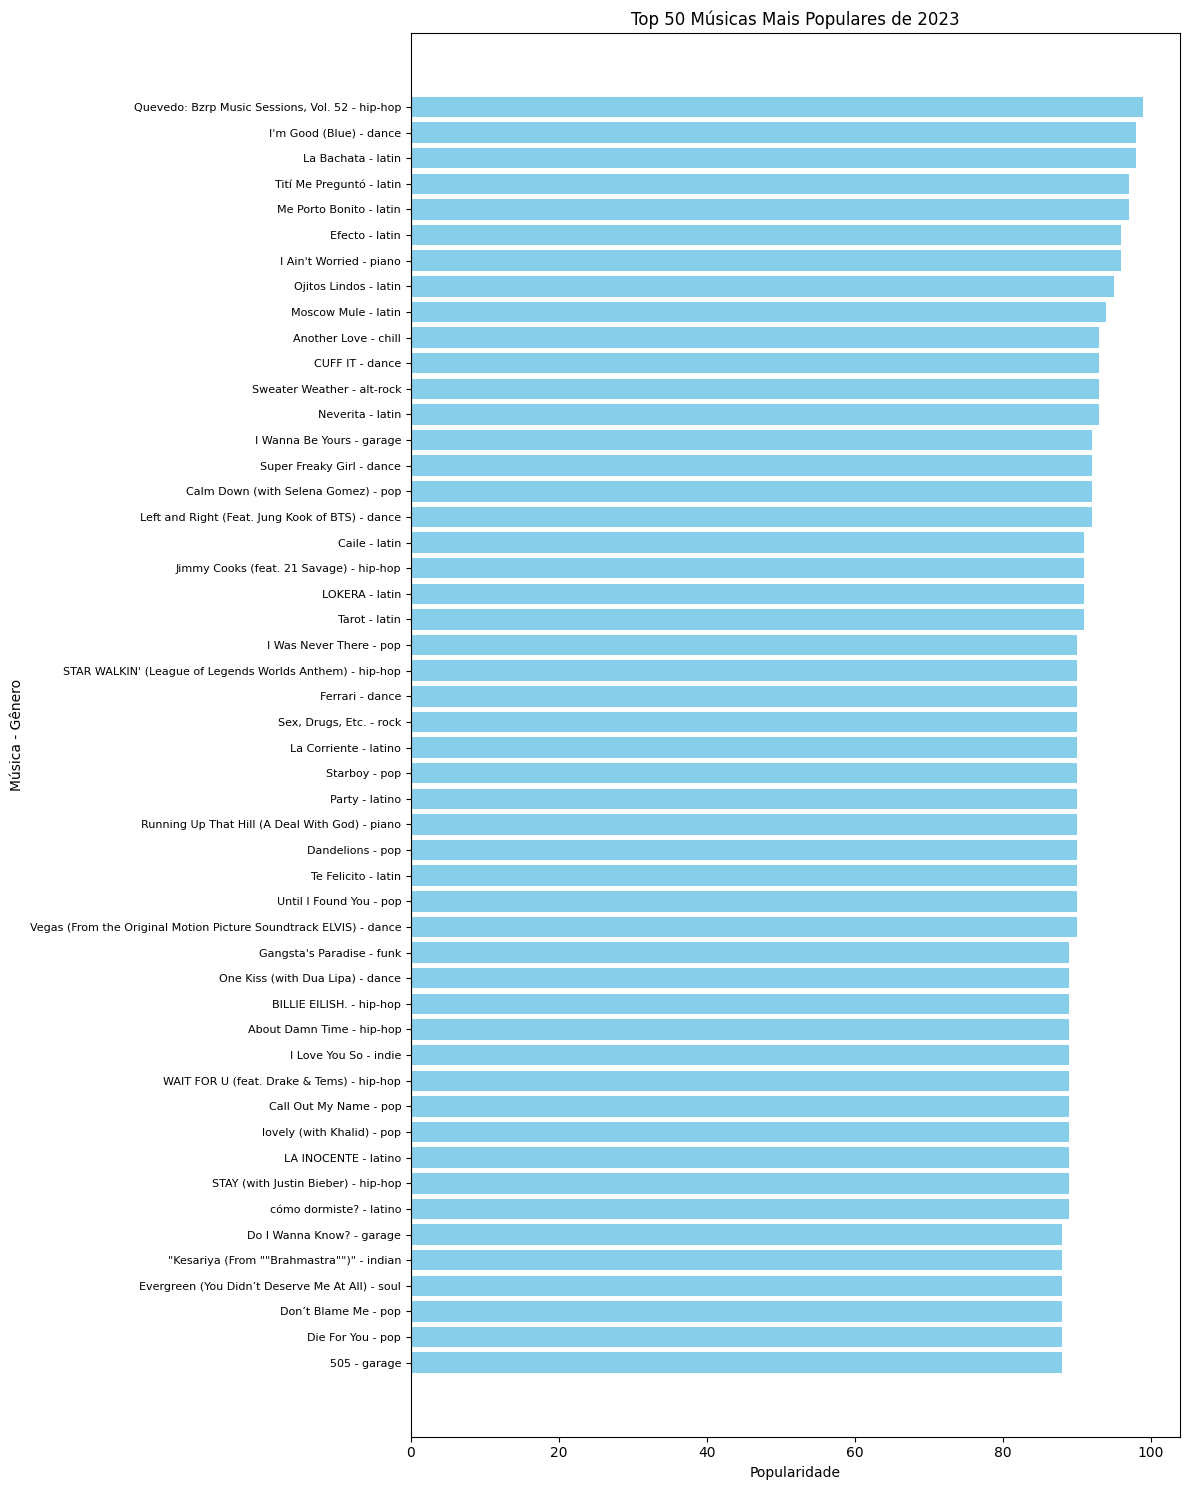

In [22]:
#As 50 músicas mais populares do spotify no ano de 2023
df_SemDuplic = df.dropDuplicates(subset=['track_name'])

top_50_musicas = df_SemDuplic.orderBy(col("popularity").desc()).limit(50)
top_50_musicas_pd = top_50_musicas.toPandas()

plt.figure(figsize=(12, 15))
plt.barh(top_50_musicas_pd['track_name'] + ' - ' + top_50_musicas_pd['track_genre'], top_50_musicas_pd['popularity'], color='skyblue')
plt.xlabel('Popularidade')
plt.ylabel('Música - Gênero')
plt.title('Top 50 Músicas Mais Populares de 2023')
plt.gca().invert_yaxis()
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

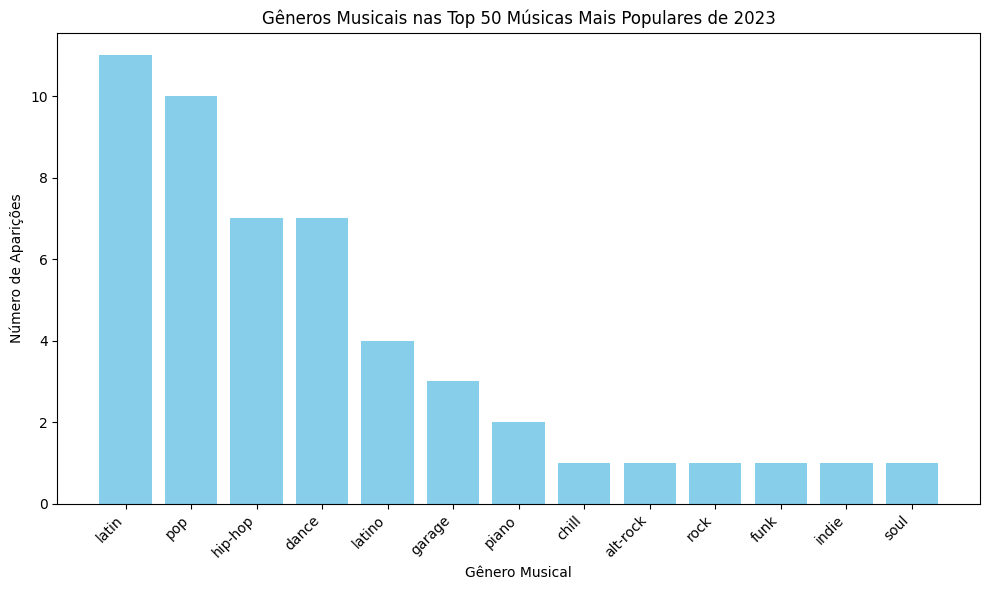

In [23]:
#Os gêneros mais populares do spotify no ano de 2023
genero_frequencia = top_50_musicas.groupBy("track_genre").count().orderBy(col("count").desc())

genero_frequencia_pd = genero_frequencia.toPandas()
plt.figure(figsize=(10, 6))
plt.bar(genero_frequencia_pd['track_genre'], genero_frequencia_pd['count'], color='skyblue')
plt.xlabel('Gênero Musical')
plt.ylabel('Número de Aparições')
plt.title('Gêneros Musicais nas Top 50 Músicas Mais Populares de 2023')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Análise de Correlação

Duração das músicas x popularidade

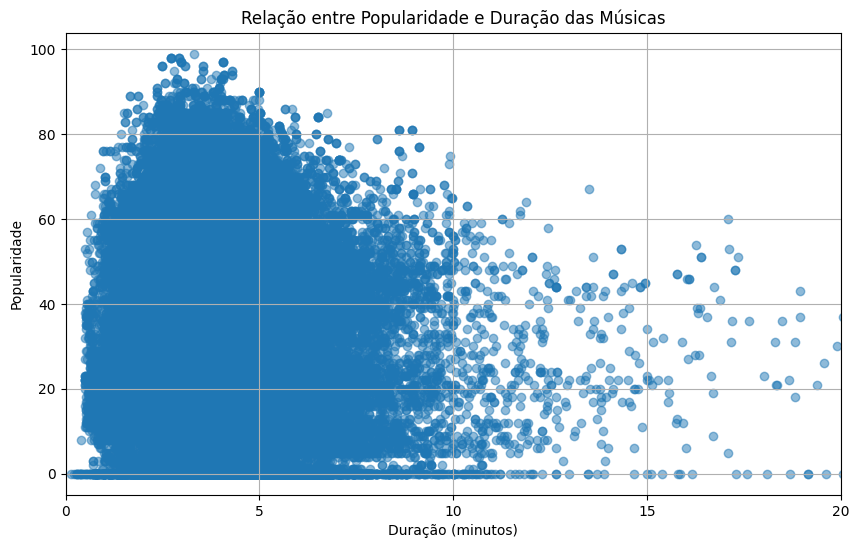

In [24]:
df_com_duracao_minutos = df.withColumn("duration_minutes", col("duration_ms") / 60000.0)
df_MinPopu = df_com_duracao_minutos.select("duration_minutes", "popularity")
df_MinPopu = df_MinPopu.toPandas()

plt.figure(figsize=(10, 6))
plt.scatter(df_MinPopu['duration_minutes'], df_MinPopu['popularity'], alpha=0.5)
plt.title('Relação entre Popularidade e Duração das Músicas')
plt.xlabel('Duração (minutos)')
plt.ylabel('Popularidade')
plt.grid(True)
plt.xticks([0, 5, 10, 15, 20])
plt.xlim(0, 20)

plt.show()

Dançabilidade vs. Popularidade

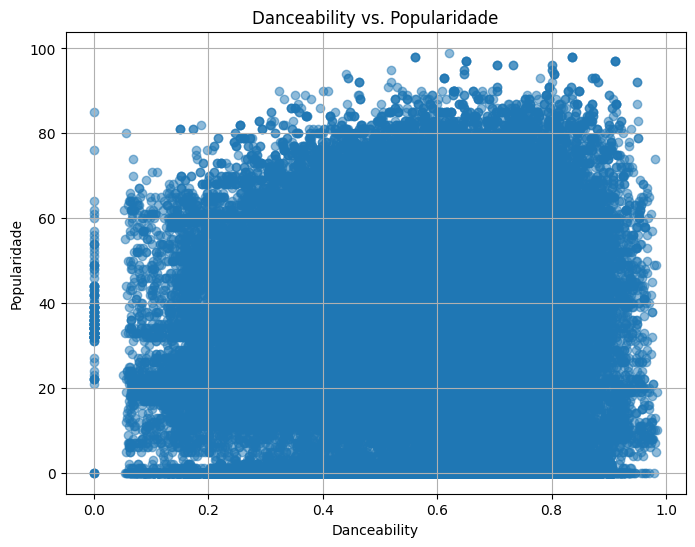

In [25]:
df_DancPopu = df.select("danceability", "popularity")
df_DancPopu = df_DancPopu.toPandas()

plt.figure(figsize=(8, 6))
plt.scatter(df_DancPopu['danceability'], df_DancPopu['popularity'], alpha=0.5)
plt.title('Danceability vs. Popularidade')
plt.xlabel('Danceability')
plt.ylabel('Popularidade')
plt.grid(True)
plt.show()

Instrumentalidade x Popularidade

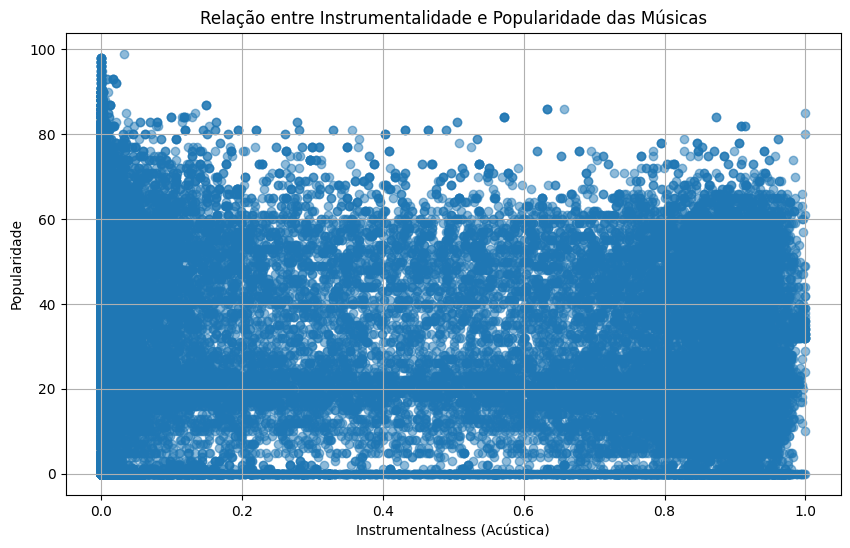

In [26]:
df_InstPopu = df.select("instrumentalness", "popularity")
df_InstPopu = df_InstPopu.toPandas()

plt.figure(figsize=(10, 6))
plt.scatter(df_InstPopu['instrumentalness'], df_InstPopu['popularity'], alpha=0.5)
plt.title('Relação entre Instrumentalidade e Popularidade das Músicas')
plt.xlabel('Instrumentalness (Acústica)')
plt.ylabel('Popularidade')
plt.grid(True)
plt.show()

Acusticidade x Popularidade

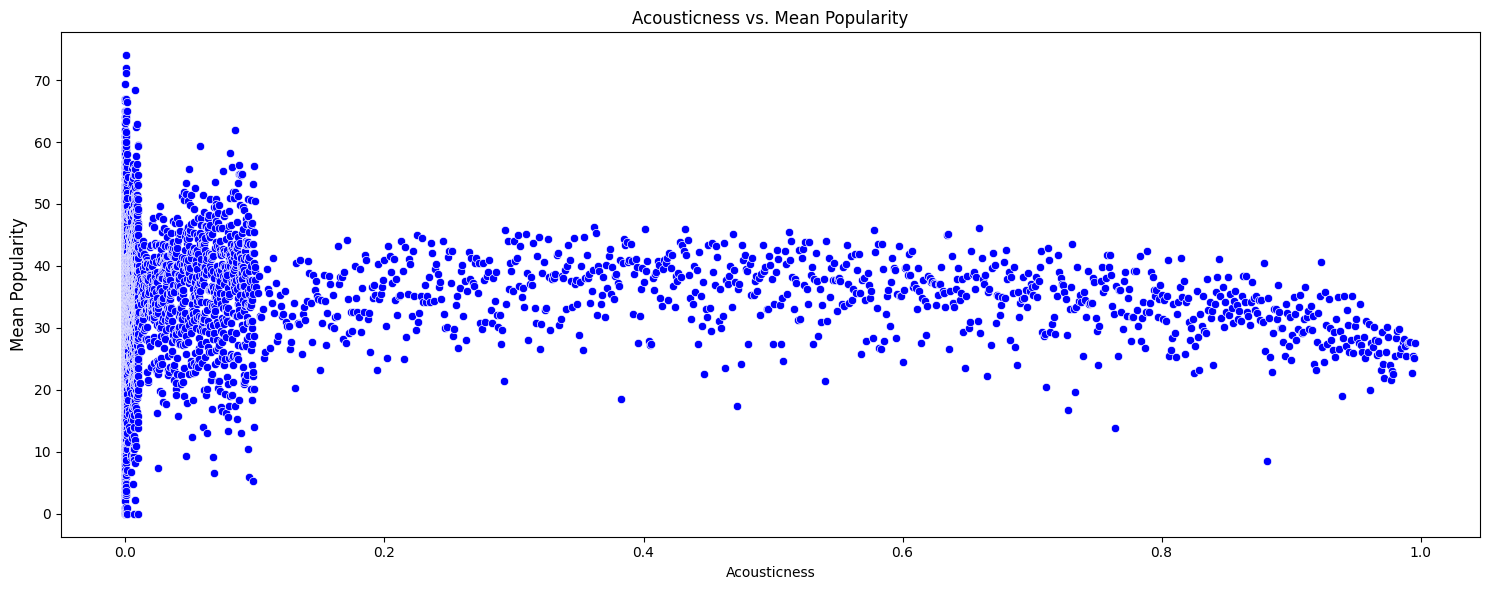

In [27]:
media_popularidade_por_acousticness = df.groupBy("acousticness").agg(avg("popularity").alias("mean_popularity")).orderBy("acousticness")
media_popularidade_por_acousticness = media_popularidade_por_acousticness.toPandas()

fig, ax = plt.subplots(figsize=(15, 6))
sns.scatterplot(x='acousticness', y='mean_popularity', data=media_popularidade_por_acousticness, color='blue', ax=ax)
ax.set_title('Acousticness vs. Mean Popularity')
ax.set_xlabel('Acousticness')
ax.set_ylabel('Mean Popularity', fontsize=12)
plt.tight_layout()
plt.show()

# Conclusões da Análise de Correlação

 - Gêneros nas Top 50

Esse gráfico ajuda na identificação de tendências, por exemplo como o latin está em ascensão, isso pode gerar uma demanda de produções de novas músicas dentro desse gênero.

Também ajuda na identificação de de padrões de sucesso, por exemplo o uso de sintetizadores como o The Weekend faz em seus trabalhos mais relevantes, o que pode ser destacado com um padrão de sucesso que outros artistas podem copiar.

Produtores, engenheiros de som, empresários podem direcionar seus esforços para atribuir elementos musicais que se encaixam nas categorias dominantes.

 - Popularidade x Duração
Por que músicas com menor duração são mais populares? Isso pode levar a várias conclusões, porém levando para o tempo atual, a falta de tempo e atenção disponíveis vindo da crescente velocidade da vida e a abundância de informações levam a pessoa a não apreciar músicas mais longas.

Com o advento das plataformas online como streamings, ficou mais fácil controlar o que você escuta, muitas vezes as pessoas não chegam até o final, pois só conseguem chegar no primeiro refrão, ativando assim, os altos níveis de dopamina no cérebro.

 - Dançabilidade x Popularidade
O alto nível de dançabilidade demonstra que esses tipos de músicas tendem a gerar emoções positivas e estimulam na participação ativa dos ouvintes. Além de ter um apelo universal, são aprediados por pessoas de diferentes origens culturais e gostos musicais.

O que também alavanca a popularidade desse tipo de música é o atrelamento a apps como instagram e tiktok, que são apps de conteúdos diversos, porém a característica principal é a escolha de uma música dançante.

 - Instrumentalidade x Popularidade
De acordo com o gráfico, há uma popularidade maior nas faixas que possuem elementos vocais, por quê? Bem, observa-se uma crescente valorização dos vocais na indústria musical, o que já nos deixa, de certa forma, mais familiarizado com a presença. Sem dizer que o conteúdo lírico pode trazer uma experiência mais rica para a música e uma conexão mais fácil com o ouvinte. E também há gêneros musicais que dependem dos vocais, como o Hip-Hop e o Rap.

 - Acusticidade
Alguns gêneros como Rap, Hip-Hop, Rock incorporam elementos não acústicos, como elementos eletrônicos e sintéticos em suas produções. Essa mistura pode contribuir para a popularidade dessas músicas, atraindo um público mais diversificado. Tembém com a evolução da tecnologia, as experimentações vêm sendo mais usados, visto que a computação facilitou as técnicas de produção de música.